## Решаем задачу поиска лояльных пользователей для для отдела маркетинга

### Алгоритм
1. импорт библиотек и данных
2. формируем таблицы с данными для расчета метрики лояльности:
    - user_id, brend_name
    - user_id, purchases(общее количество покупок пользователя)
    - user_id, unique_brands (колиество уникальных брендов, которые закупал пользователь )
    - user_id, lovely_brand(бренд на который пришлось наибольшее количество покупок пользователя), lovely_brand_purchases(количество закупок любимого бренда)
3. формируем датасет с лояльными пользователями (мерджим):
      - user_id, purchases, unique_brands, lovely_brand, lovely_brand_purchases
    

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline 

In [3]:
df = pd.read_csv('lesson_3_data.csv', encoding='windows-1251')

In [4]:
df.head(5)

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [6]:
result = "df has {} rows and {} columns"
y = df.shape[1]
x = df.shape[0]
df_shape = result.format(x, y)
print(df_shape)


df has 48129 rows and 21 columns


In [5]:
user_df = df[['tc', 'art_sp']]

In [6]:
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [7]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

In [8]:
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [9]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

In [10]:
brnad_name = 'MARAVILLA 500 G Store_Brand'

In [11]:
brnad_name.split(' ')[-1]

'Store_Brand'

In [12]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

In [13]:
# user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])
# используем lambda функцию, чтобы разрезать строку по пробелу и взять последний элемент

In [14]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [15]:
#из дз 
user_df['bool'] = user_df.brand_name.apply(lambda x: x == "Store_Brand")
user_df

,user_id,brand_info,brand_name,bool
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand,True
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand,True
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1,False
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7,False
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2,False
...,...,...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4,Brand_4,False
48125,110824211,PLUMAS 3 500 G Brand_4,Brand_4,False
48126,1408670389,MACARRONES 500 G Store_Brand,Store_Brand,True
48127,1408670389,SPAGHETTI 500 G Store_Brand,Store_Brand,True


In [16]:
#HW
uniq_l = user_df.nunique()
uniq_l

user_id       11764
brand_info       59
brand_name        8
bool              2
dtype: int64

In [17]:
user_df.dtypes

user_id        int64
brand_info    object
brand_name    object
bool            bool
dtype: object

In [18]:
user_df.isnull().sum()

user_id       0
brand_info    0
brand_name    0
bool          0
dtype: int64

In [19]:
users_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': 'count'}) \
    .rename(columns={'brand_name': 'purchases'}) \
    .query('purchases >= 5')
users_purchases

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5
...,...,...
11740,1408767189,5
11750,1408783189,10
11751,1408783379,6
11754,1408798879,8


In [20]:
users_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns={'brand_name': 'unique_brands'})
users_unique_brands

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [21]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info': 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name': 'lovely_brand','brand_info': 'lovely_brand_purchases'})
lovely_brand_purchases_df

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [22]:
loyalty_df = users_purchases \
    .merge(users_unique_brands, on='user_id') \
    .merge(lovely_brand_purchases_df, on='user_id')
loyalty_df

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2
...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5
3379,1408783189,10,2,Store_Brand,8
3380,1408783379,6,2,Brand_1,4
3381,1408798879,8,3,Store_Brand,4


In [23]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [24]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

In [25]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases / loyalty_df.purchases

In [26]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


C:\Users\firew\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


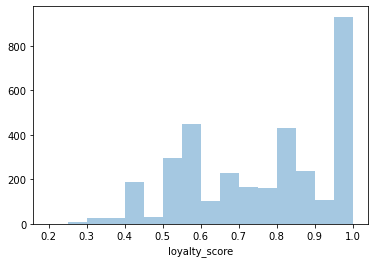

In [27]:
ax = sns.distplot(loyalty_df.loyalty_score, kde=False)

In [28]:
brands_loyalty = loyalty_df.groupby('lovely_brand', as_index=False) \
    .agg({'loyalty_score': 'median', 'user_id': 'count'}) 

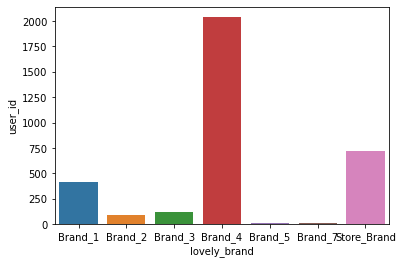

In [29]:
ax = sns.barplot(x="lovely_brand", y="user_id", data=brands_loyalty)

## HW


In [30]:
df = df.rename(columns={'Клиент Id': 'klient_id'})

In [31]:
taxi_peru = pd.read_csv('3_taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])
taxi_peru.head(5)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [32]:
taxi_peru['user_id'].count()

23111

<AxesSubplot:xlabel='source', ylabel='source_count'>

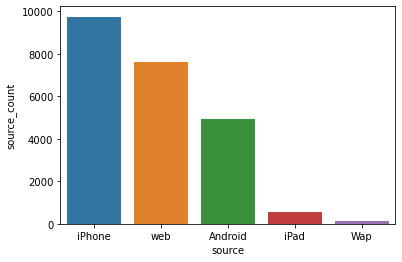

In [33]:
source = taxi_peru[['user_id', 'source']]
best_source = source.groupby('source', as_index=False)\
                    .agg({'user_id': 'count'})\
                    .rename(columns={'user_id': 'source_count'})

best_source['count_part'] = (best_source['source_count'] / taxi_peru['user_id'].count() *100).round(2)

best_source = best_source.sort_values(by='source_count', ascending=False)
sns.barplot(data=best_source, x="source", y="source_count")

C:\Users\firew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='icon', ylabel='count'>

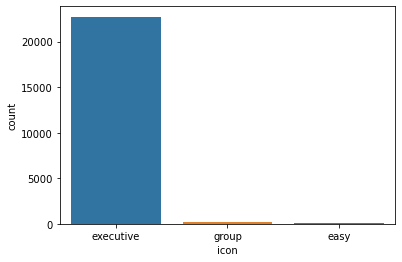

In [34]:
# какой тип поездок встречается чаще всего (основная таблица taxi_peru)
sns.countplot(taxi_peru.icon)

In [35]:
#используем sns.countplot для 

C:\Users\firew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='source', ylabel='count'>

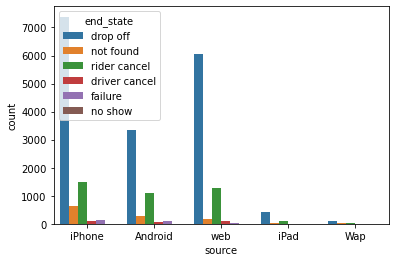

In [36]:
# с помощью sns.countplo и hue выводим источник по x, по y countplot сам расчитывает значения переданные в hue - в данном случае статусы отказов.
sns.countplot(taxi_peru.source, hue= taxi_peru.end_state)

In [37]:
taxi_peru.columns

Index(['journey_id', 'user_id', 'driver_id', 'taxi_id', 'icon', 'start_type',
       'start_at', 'start_lat', 'start_lon', 'end_at', 'end_lat', 'end_lon',
       'end_state', 'driver_start_lat', 'driver_start_lon', 'arrived_at',
       'source', 'driver_score', 'rider_score'],
      dtype='object')

In [38]:
taxi_peru['score'] = taxi_peru.driver_score.value_counts(normalize=True)\
                                .mul(100).round(2)\
                                

                              
taxi_peru

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,14.30
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,1.23
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,0.81
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,2.97
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,21.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0,NaN
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0,NaN
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0,NaN
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0,NaN


In [39]:
driver_score_counts = taxi_peru.driver_score.value_counts(normalize=True).mul(100).round(2) \
                                                .reset_index() \
                                                .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'})\
                                                .sort_values('driver_score')
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


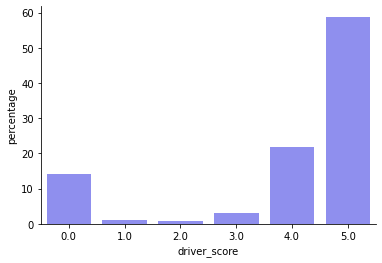

In [40]:
#построим график (import seaborn as sns, import matplotlib.pyplot as plt)

ax = sns.barplot(x = 'driver_score', y = 'percentage', data = driver_score_counts, color='blue', alpha=0.5)
ax.set_xlable = 'Driver score'
ax.set_ylable = 'Percentage'
sns.despine()
plt.show()

In [41]:
rider_score_counts = taxi_peru.rider_score.value_counts(normalize=True).mul(100).round(2) \
                                                .reset_index() \
                                                .rename(columns={'index': 'rider_score', 'rider_score': 'percentage'})\
                                                .sort_values('rider_score')
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


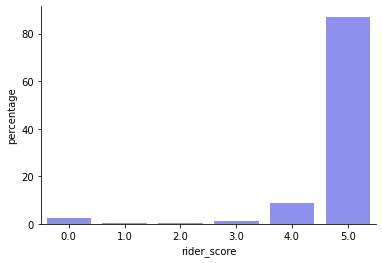

In [42]:
#построим график (import seaborn as sns, import matplotlib.pyplot as plt)

ax = sns.barplot(x = 'rider_score', y = 'percentage', data = rider_score_counts, color='blue', alpha=0.5)
ax.set_xlable = 'Rider score'
ax.set_ylable = 'Percentage'
sns.despine()
plt.show()

In [43]:
taxi_peru.head(5)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,14.30
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,1.23
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,0.81
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,2.97
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,21.88


In [44]:
taxi_peru.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
score                      float64
dtype: object

Продолжим анализ данных по поездкам на такси из Перу. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!

Ссылка на датасет находится в переменной path_to_file. Сохраните данные в переменную taxi, разделитель — ;.

Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) 

In [45]:
taxi_peru[['start_at', 'end_at', 'arrived_at']] = taxi_peru[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)
start_types = taxi_peru.query('start_type == "asap" & start_type == "reserved"')
start_types = taxi_peru[((taxi_peru['start_type'] == 'asap') | (taxi_peru['start_type'] == 'reserved'))]
start_types.head(5)


,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,14.30
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,1.23
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,0.81
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,2.97
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,21.88


In [46]:
taxi_peru['start_at'] = pd.to_datetime(start_at.Date)

NameError: name 'start_at' is not defined

In [47]:
taxi_peru['wait_time'] = (taxi_peru.arrived_at - taxi_peru.start_at).astype('timedelta64[m]')
taxi_peru['wait_time']

0        18.0
1         NaN
2         NaN
3         NaN
4        -5.0
         ... 
23106     0.0
23107    13.0
23108     9.0
23109    -7.0
23110     NaN
Name: wait_time, Length: 23111, dtype: float64

In [48]:
taxi_peru.head(5)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,"-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,14.30,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,"-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,1.23,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,"-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,0.81,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,"-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,2.97,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,"-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,21.88,-5.0


In [49]:
chec_driver = taxi_peru[((taxi_peru['wait_time'] > 0) & (taxi_peru['start_type'] == 'reserved'))] \
                        
#start_type == 'reserved'
#wait_time > 0.0
chec_driver = chec_driver.groupby('driver_id', as_index = False)\
                    .agg({'wait_time': 'sum'})\
                    .sort_values('wait_time', ascending = False)
chec_driver.head(5)

,driver_id,wait_time
54,8ff94ac5183d99dc41b042ad5cb1e655,881.0
52,8d6e3838b34e9c7181ac358dbc30bfe1,731.0
29,56f59b58bcbbd1cdabc3652e713134c2,553.0
24,406921adcca37705ef527b4246c0cfea,524.0
86,d665fb9f75ef5d9cd0fd89479380ba78,468.0


In [50]:
# кто из таксистов чаще всего опаздывал на зарезервированный заказ
chec_driver_2 = taxi_peru.query('start_type == "reserved"')
chec_driver_2 = chec_driver.query('wait_time > 0')
chec_driver_2 = chec_driver.groupby('driver_id', as_index = False)\
                    .agg({'wait_time': 'count'})\
                    .sort_values('wait_time', ascending = False)
chec_driver_2

,driver_id,wait_time
0,0aa51cbf1d21c8c6462dbf0e10028a07,1
53,8ed36e0e9dbf62743c06c09e5f6b5be7,1
77,c814db2127582cf95dea1f74f43127c2,1
76,c76f7b7ecd87b555ba34fa076d6751c0,1
75,c75c6643b92e4b184d71197e0ff9d34d,1
...,...,...
32,593ae49af455f324457edc1472aee6ad,1
31,593ae49af455f324457edc1472ae6cce,1
30,583949a89a9ee17d19e3ca4f137b6b4c,1
29,56f59b58bcbbd1cdabc3652e713134c2,1


In [69]:
taxi_peru[['start_at', 'end_at', 'arrived_at']] = taxi_peru[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)
#taxi_peru = taxi_peru[((taxi_peru['start_type'] == 'asap') | (taxi_peru['start_type'] == 'reserved'))]
taxi_peru['month'] = taxi_peru['start_at'].dt.strftime('%m').astype('int64')
taxi_peru['weekday'] = taxi_peru['start_at'].dt.strftime('%A')
taxi_peru.head(5)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,14.30,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,NaN,NaN,NaT,iPhone,NaN,NaN,1.23,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,NaN,NaN,NaT,iPhone,NaN,NaN,0.81,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,NaN,NaN,NaT,iPhone,NaN,NaN,2.97,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,21.88,-5.0,9,Saturday


C:\Users\firew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

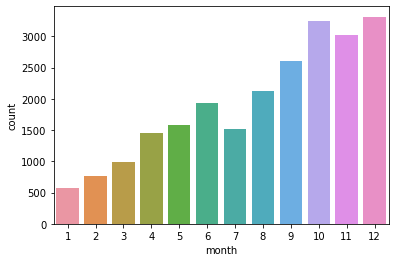

In [67]:
sns.countplot(taxi_peru.month, x='month')

C:\Users\firew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


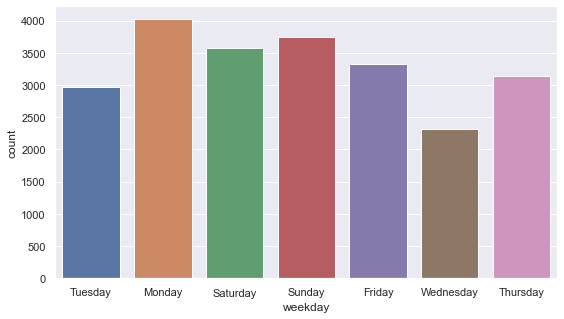

In [106]:
sns.countplot(taxi_peru.weekday, x='weekday')
sns.set(rc = {'figure.figsize':(7,5)})

In [107]:
taxi_peru.head(5)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,14.30,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,NaN,NaN,NaT,iPhone,NaN,NaN,1.23,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,NaN,NaN,NaT,iPhone,NaN,NaN,0.81,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,NaN,NaN,NaT,iPhone,NaN,NaN,2.97,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,21.88,-5.0,9,Saturday


In [145]:
MAU_data = taxi_peru[['user_id', 'month', 'weekday']]
user_per_month = MAU_data.groupby('month', as_index=False).agg({'user_id': pd.Series.nunique})
#taxi_peru['MAU'] = MAU_data['user_id'].nunique() / (taxi_peru.groupby('month', as_index=False).agg({'user_id': 'count'}))
#sns.countplot('MAU', x='user_id')
#MAU
MAU_data
user_per_month
user_per_month['MAU'] = (user_per_month['user_id'] / MAU_data['user_id'].nunique()).mul(100).round(2)
#sns.countplot(user_per_month.MAU, x='MAU')
user_per_month

,month,user_id,MAU
0,1,102,7.35
1,2,110,7.93
2,3,162,11.67
3,4,253,18.23
4,5,275,19.81
5,6,309,22.26
6,7,318,22.91
7,8,377,27.16
8,9,416,29.97
9,10,437,31.48


<AxesSubplot:>

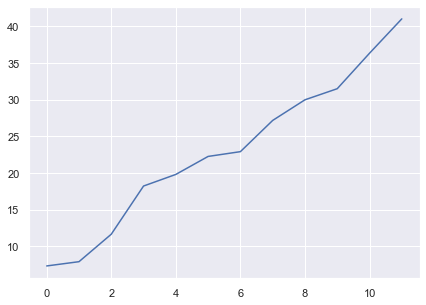

In [146]:
user_per_month['MAU'].plot.line()